# Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
import seaborn as sb

# Importando el dataset

In [2]:
filepath = '../Datasets_Proyecto2/creditcard.csv'
dataset = pd.read_csv(filepath)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Generar el conjunto de prueba

In [3]:
dataset_copy = dataset[dataset["Time"] > 0]
y = dataset_copy["Class"]
X = dataset_copy.drop("Class", axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
98499,66685.0,1.036897,-0.649383,0.908567,0.685158,-1.219959,-0.237565,-0.574337,-0.005797,-0.861620,...,-0.336174,-0.128082,-0.050805,-0.012143,0.381581,0.243489,-0.302407,0.068348,0.056656,114.00
254103,156581.0,-3.742647,4.746335,-4.998766,-1.404972,1.369761,-2.283748,1.725160,-0.356590,3.266303,...,2.056978,-0.769622,-0.221753,-0.113254,-1.180682,0.716065,0.051143,0.447399,-0.332467,7.59
172792,121241.0,1.634359,-2.350544,-0.929398,-1.394847,-1.220020,0.702985,-1.110775,0.129064,-1.154218,...,0.021767,0.110094,0.400056,0.121026,-0.955125,-0.598788,-0.112006,0.034345,-0.008881,276.00
210110,137846.0,2.048171,-0.034523,-1.057958,0.419257,-0.108173,-1.203915,0.230353,-0.367527,0.459944,...,-0.176140,-0.278237,-0.657905,0.328624,0.061169,-0.284309,0.192842,-0.068621,-0.057457,8.99
127665,78420.0,-1.164792,-0.918348,1.975678,-2.351528,-0.883270,-0.455050,-0.249784,-0.023322,-2.277242,...,-0.418656,-0.306449,-0.604681,-0.046484,0.025501,0.063628,-0.469483,0.037243,0.044304,125.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25820,33778.0,1.217335,0.723442,-0.087204,1.382392,-0.074624,-1.369397,0.347111,-0.301384,-0.200023,...,-0.075467,-0.023240,0.033364,-0.086541,0.620461,0.669383,-0.349906,0.036473,0.055924,1.00
207919,136889.0,2.056846,-0.325512,-3.428442,-0.793279,2.856486,2.921284,0.082990,0.550549,0.030365,...,-0.108913,0.108433,0.338025,-0.009957,0.792101,0.377541,0.845543,-0.108217,-0.088636,29.95
7295,9764.0,-2.054677,0.857044,1.616495,-1.129761,0.010039,-0.469386,0.384284,-0.175665,1.504267,...,-0.161154,-0.305552,-0.536627,-0.354376,-0.011707,0.144188,0.771797,-0.388406,0.370277,60.96
228574,145571.0,2.067459,-0.066069,-1.094406,0.403728,-0.133060,-1.184173,0.167832,-0.318477,0.579052,...,-0.237511,-0.296144,-0.728138,0.335688,-0.030292,-0.297414,0.200541,-0.072154,-0.061121,1.29


In [5]:
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [6]:
y_train

69793     0
112091    0
126095    0
271992    0
137829    0
         ..
25820     0
207919    0
7295      0
228574    0
190525    0
Name: Class, Length: 222844, dtype: int64

# Explorar los datos para obtener ideas

In [7]:
# Información generales de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Información estadística de los datos
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# N° de filas y N° de columnas
dataset.shape

(284807, 31)

In [10]:
# Un atributo importante a tomar en cuenta es el monto de la transacción con la tarjeta de crédito.
# Normalmente habrá más probabilidades de fraudes cuando el monto sea muy elevado.

dataset["Amount"].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

<AxesSubplot:>

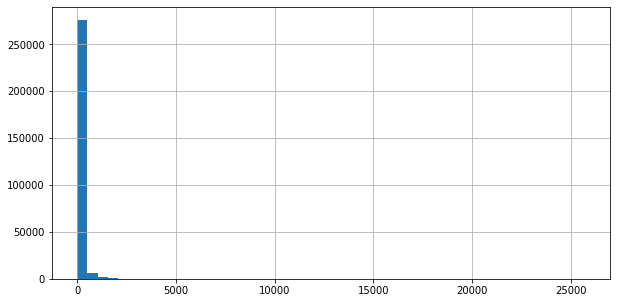

In [11]:
dataset["Amount"].hist(bins=50, figsize=(10,5))

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

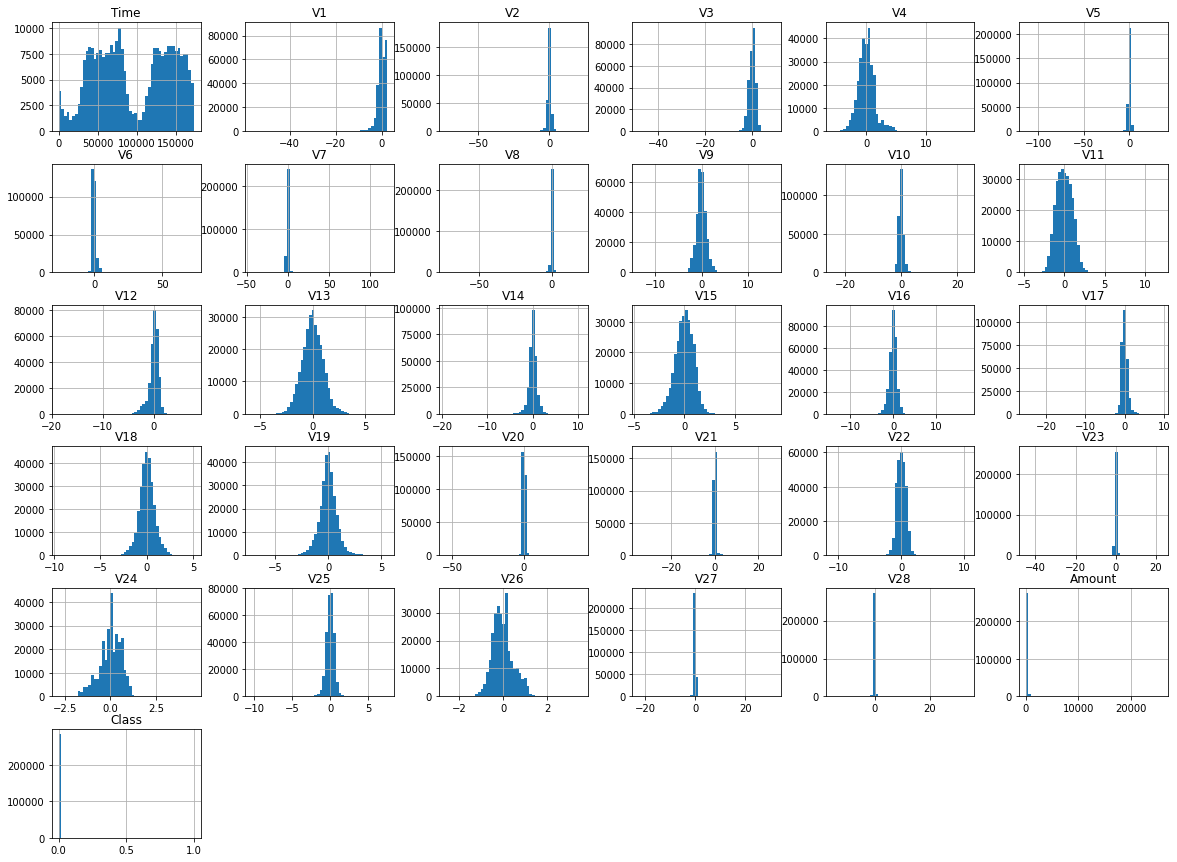

In [12]:
# Igualmente se gráfican todas los atributos que sean de tipo númerico

dataset.hist(bins=50, figsize=(20,15))

### Correlación de los datos (Matriz de Correlación)

In [13]:
corr_matrix = dataset.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

array([[<AxesSubplot:xlabel='Class', ylabel='Class'>,
        <AxesSubplot:xlabel='V11', ylabel='Class'>,
        <AxesSubplot:xlabel='V4', ylabel='Class'>,
        <AxesSubplot:xlabel='V2', ylabel='Class'>],
       [<AxesSubplot:xlabel='Class', ylabel='V11'>,
        <AxesSubplot:xlabel='V11', ylabel='V11'>,
        <AxesSubplot:xlabel='V4', ylabel='V11'>,
        <AxesSubplot:xlabel='V2', ylabel='V11'>],
       [<AxesSubplot:xlabel='Class', ylabel='V4'>,
        <AxesSubplot:xlabel='V11', ylabel='V4'>,
        <AxesSubplot:xlabel='V4', ylabel='V4'>,
        <AxesSubplot:xlabel='V2', ylabel='V4'>],
       [<AxesSubplot:xlabel='Class', ylabel='V2'>,
        <AxesSubplot:xlabel='V11', ylabel='V2'>,
        <AxesSubplot:xlabel='V4', ylabel='V2'>,
        <AxesSubplot:xlabel='V2', ylabel='V2'>]], dtype=object)

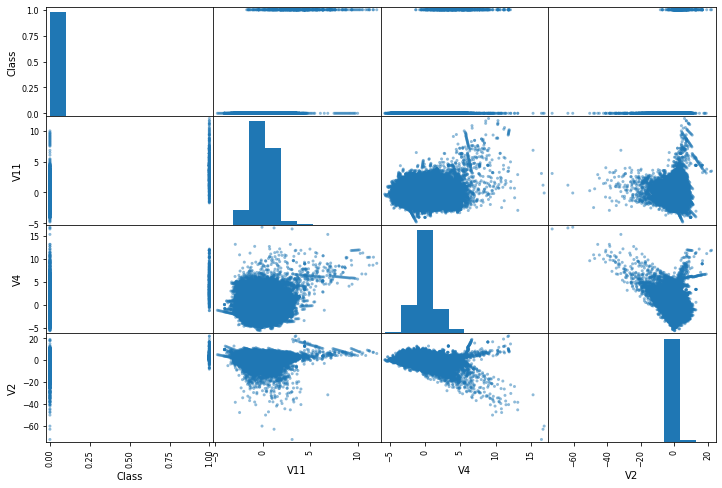

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["Class", "V11", "V4", "V2"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

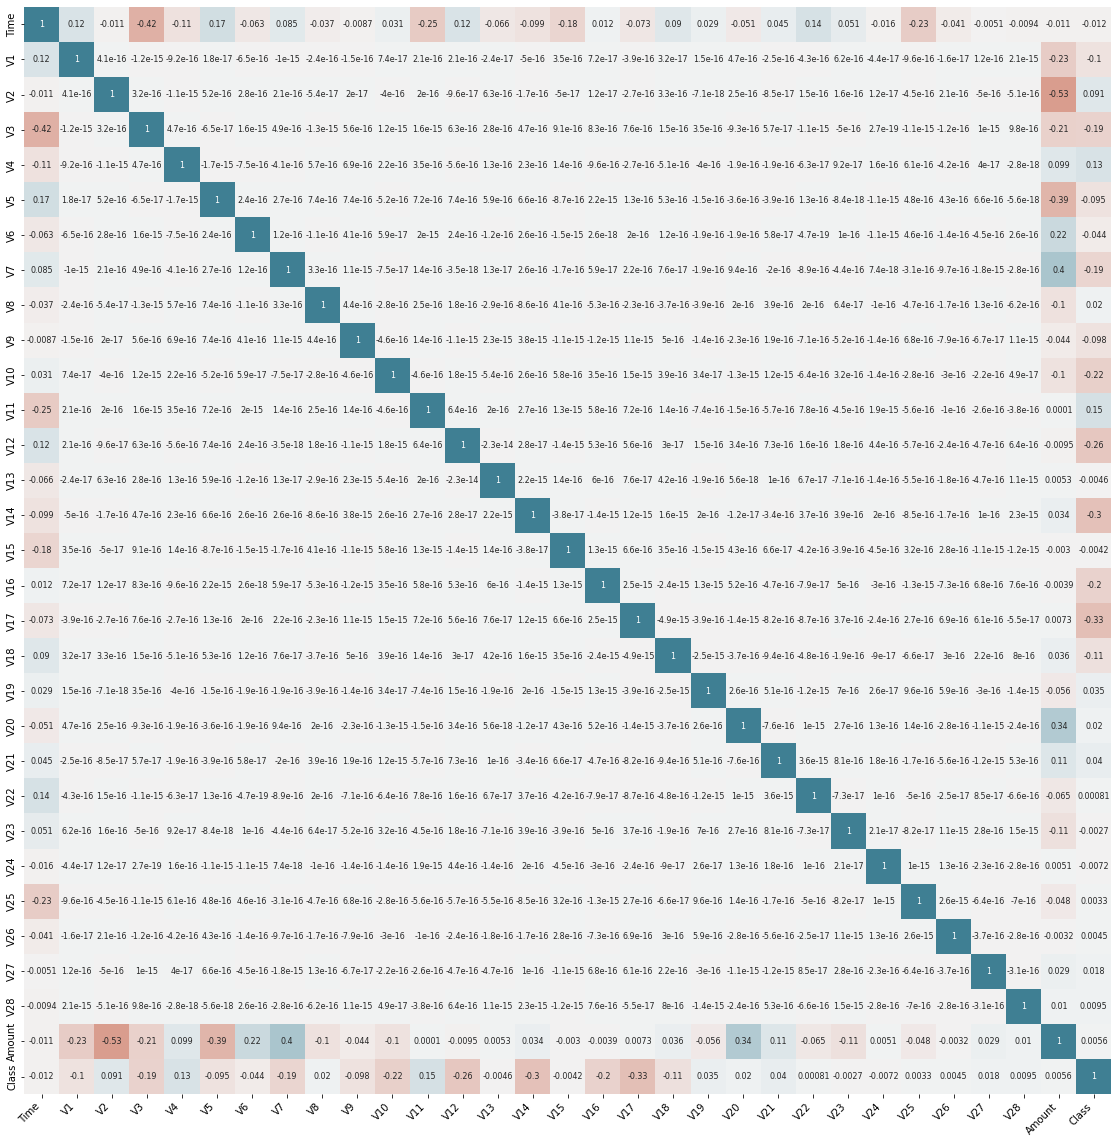

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))

sb.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 8},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sb.diverging_palette(20, 220, n=200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.

In [16]:
dataset_copy = dataset_copy.drop("Class", axis=1)

In [17]:
dataset.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [18]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
incomplete_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


No hay datos faltantes. En caso de hubiera datos faltantes de tipo numerico entonces se le coloca el valor medio.

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [20]:
dataset_num = dataset_copy.select_dtypes(include=[np.number])
imputer.fit(dataset_num.values)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([ 8.46930000e+04,  1.81087992e-02,  6.54855564e-02,  1.79846344e-01,
       -1.98503577e-02, -5.43358267e-02, -2.74187252e-01,  4.01030828e-02,
        2.23561678e-02, -5.14287316e-02, -9.29173836e-02, -3.27573545e-02,
        1.40032588e-01, -1.35680568e-02,  5.06048371e-02,  4.80638485e-02,
        6.64133206e-02, -6.56757538e-02, -3.63631235e-03,  3.73482300e-03,
       -6.24810925e-02, -2.94501677e-02,  6.78194253e-03, -1.11929303e-02,
        4.09760561e-02,  1.65756805e-02, -5.21391080e-02,  1.34214598e-03,
        1.12438316e-02,  2.20000000e+01])

In [22]:
dataset_num.median().values

array([ 8.46930000e+04,  1.81087992e-02,  6.54855564e-02,  1.79846344e-01,
       -1.98503577e-02, -5.43358267e-02, -2.74187252e-01,  4.01030828e-02,
        2.23561678e-02, -5.14287316e-02, -9.29173836e-02, -3.27573545e-02,
        1.40032588e-01, -1.35680568e-02,  5.06048371e-02,  4.80638485e-02,
        6.64133206e-02, -6.56757538e-02, -3.63631235e-03,  3.73482300e-03,
       -6.24810925e-02, -2.94501677e-02,  6.78194253e-03, -1.11929303e-02,
        4.09760561e-02,  1.65756805e-02, -5.21391080e-02,  1.34214598e-03,
        1.12438316e-02,  2.20000000e+01])

In [23]:
X = imputer.transform(dataset_num.values)

In [24]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset_copy.index)

In [25]:
dataset_tr.loc[incomplete_rows.index.values]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount


In [26]:
imputer.strategy

'median'

In [27]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset_num.index)
dataset_tr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99


### Manejo de atributos que tienen categorías

In [28]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


No hay atributos que tengan categorías

### Feature engineering, crear atributos combinados

In [29]:
def feature_engineering(data):
    data["amount_per_seconds"] = data["Amount"] / data["Time"]
    return data

In [30]:
dataset_feature_engineered = feature_engineering(dataset_copy)
dataset_feature_engineered

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,amount_per_seconds
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.660000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.500000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,34.995000
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,1.835000
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,1.247500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000004
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000143
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.000393
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000058


### Transformación personalizada

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "Time", "Amount"
seconds_ix, amount_ix = [dataset_copy.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_amount_per_seconds=True):
        self.add_amount_per_seconds = add_amount_per_seconds
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.add_amount_per_seconds:
            amount_per_seconds = X[:, amount_ix] / X[:, seconds_ix]
            return np.c_[X, amount_per_seconds]
        else:
            return np.c_[X]

attr_adder = CombinedAttributesAdder(add_amount_per_seconds=False)
dataset_extra_attribs = attr_adder.transform(dataset_copy.values)

dataset_extra_attribs = pd.DataFrame(
    dataset_extra_attribs,
    columns=list(dataset_copy.columns),
    index=dataset_copy.index)
dataset_extra_attribs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,amount_per_seconds
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.660000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.500000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,34.995000
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,1.835000
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,1.247500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000004
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000143
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.000393
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000058


### Pipelines de transformación

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

dataset_num_tr = num_pipeline.fit_transform(dataset_num.values)
dataset_num_tr

array([[-1.99659692e+00, -6.93499366e-01, -8.11574605e-01, ...,
        -1.81020261e-01,  1.16068187e+00,  4.98192648e+02],
       [-1.99659692e+00, -4.93324205e-01, -1.12168625e-01, ...,
         1.86187867e-01,  1.40533460e-01,  1.62480948e+02],
       [-1.99657586e+00, -5.91328873e-01,  5.31539621e-01, ...,
         6.51813567e-01, -7.34034477e-02,  4.60357219e+01],
       ...,
       [ 1.64197670e+00,  9.80021460e-01, -1.82432682e-01, ...,
        -8.04669831e-02, -8.18393826e-02, -6.36556703e-03],
       [ 1.64197670e+00, -1.22755446e-01,  3.21249640e-01, ...,
         3.16685601e-01, -3.13247871e-01, -6.80629318e-03],
       [ 1.64206093e+00, -2.72330687e-01, -1.14898170e-01, ...,
         4.13497738e-02,  5.14353323e-01, -5.23013388e-03]])

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = list(dataset_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

dataset_prepared = full_pipeline.fit_transform(dataset_copy)
dataset_prepared

array([[-1.99659692e+00, -6.93499366e-01, -8.11574605e-01, ...,
        -1.81020261e-01,  1.16068187e+00,  4.98192648e+02],
       [-1.99659692e+00, -4.93324205e-01, -1.12168625e-01, ...,
         1.86187867e-01,  1.40533460e-01,  1.62480948e+02],
       [-1.99657586e+00, -5.91328873e-01,  5.31539621e-01, ...,
         6.51813567e-01, -7.34034477e-02,  4.60357219e+01],
       ...,
       [ 1.64197670e+00,  9.80021460e-01, -1.82432682e-01, ...,
        -8.04669831e-02, -8.18393826e-02, -6.36556703e-03],
       [ 1.64197670e+00, -1.22755446e-01,  3.21249640e-01, ...,
         3.16685601e-01, -3.13247871e-01, -6.80629318e-03],
       [ 1.64206093e+00, -2.72330687e-01, -1.14898170e-01, ...,
         4.13497738e-02,  5.14353323e-01, -5.23013388e-03]])

In [34]:
dataset_prepared.shape

(284805, 31)

# Explorar modelos diferentes y preseleccionar el mejor.

### Transformación del conjunto de entrenamiento, de validación y de prueba utilizando el pipeline de transformación definido anteriormente.

In [35]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared

array([[-8.67429244e-01,  6.38006632e-01, -2.22483714e-01, ...,
        -3.21955591e-02, -1.24809487e-01, -5.12498484e-03],
       [-4.68996860e-01,  8.01827954e-01, -6.51794204e-01, ...,
         2.89263755e-03, -2.82636020e-01, -6.11155698e-03],
       [-3.54786034e-01,  5.89594050e-01,  1.56081829e-01, ...,
         1.24237067e-01, -3.14575126e-01, -6.25573917e-03],
       ...,
       [-1.79010701e+00, -1.04475397e+00,  5.16449688e-01, ...,
         1.11258007e+00, -1.12515631e-01,  1.18752983e-03],
       [ 1.06952235e+00,  1.05214670e+00, -3.99392859e-02, ...,
        -1.83593761e-01, -3.60344820e-01, -6.43811256e-03],
       [ 7.17730268e-01, -3.82149961e-01, -2.92331420e-02, ...,
         4.08774116e-01, -7.14391992e-02, -5.77646388e-03]])

In [36]:
X_valid_prepared = full_pipeline.fit_transform(X_valid)
X_valid_prepared

array([[-0.59050836,  0.5580684 , -0.44280918, ...,  0.22059521,
         0.10446125, -0.03208695],
       [ 1.28205561, -2.06529607,  3.18116094, ..., -1.25088506,
        -0.29566933, -0.04914141],
       [ 0.5459115 ,  0.88599934, -1.58537381, ..., -0.02723399,
         0.71362538, -0.02626617],
       ...,
       [ 0.85101345, -0.80502499,  1.29994017, ...,  0.07836284,
        -0.28878803, -0.04892735],
       [-0.43721791, -0.56544985,  0.38340865, ...,  0.8190147 ,
        -0.26314297, -0.04738719],
       [ 1.23818692, -0.27750609,  0.72987823, ..., -0.08361281,
        -0.31676446, -0.0495075 ]])

In [37]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

array([[-1.41580631, -1.84215852,  1.7312059 , ...,  0.50928973,
        -0.27536386, -0.04471128],
       [ 0.12653433, -0.0234829 ,  0.68039326, ...,  0.7894736 ,
        -0.24528168, -0.04750762],
       [ 0.76044315,  0.58795316, -1.29547636, ...,  0.13927013,
         1.16861834, -0.01865162],
       ...,
       [-1.26909824, -0.80520416,  0.2554235 , ..., -0.02654397,
         0.23983106, -0.00448589],
       [ 0.44625917,  1.11494149, -0.08753606, ..., -0.22355737,
        -0.29352598, -0.04891969],
       [-0.68043292, -0.27039555,  0.55599287, ...,  0.41509419,
        -0.31071042, -0.0490481 ]])

### Modelo 1

In [38]:
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[31]),
    keras.layers.Dense(62, activation="relu"),
    keras.layers.Dense(124, activation="relu"),
    keras.layers.Dense(248, activation="relu"),
    keras.layers.Dense(496, activation="relu"),
    keras.layers.Dense(1)
])

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 31)                0         
                                                                 
 dense (Dense)               (None, 62)                1984      
                                                                 
 dense_1 (Dense)             (None, 124)               7812      
                                                                 
 dense_2 (Dense)             (None, 248)               31000     
                                                                 
 dense_3 (Dense)             (None, 496)               123504    
                                                                 
 dense_4 (Dense)             (None, 1)                 497       
                                                                 
Total params: 164,797
Trainable params: 164,797
Non-trai

In [40]:
model_1.compile(loss="mean_squared_error",
                optimizer="adam",
                metrics=["binary_accuracy"])

In [41]:
history_1 = model_1.fit(X_train_prepared, y_train, epochs=10, 
                    validation_data=(X_valid_prepared, y_valid))

Epoch 1/10
6964/6964 [==============================] - 20s 3ms/step - loss: 0.0013 - binary_accuracy: 0.9989 - val_loss: 5.3123e-04 - val_binary_accuracy: 0.9994
Epoch 2/10
6964/6964 [==============================] - 19s 3ms/step - loss: 7.2253e-04 - binary_accuracy: 0.9991 - val_loss: 2.5472e-04 - val_binary_accuracy: 0.9998
Epoch 3/10
6964/6964 [==============================] - 20s 3ms/step - loss: 6.2485e-04 - binary_accuracy: 0.9993 - val_loss: 2.8712e-04 - val_binary_accuracy: 0.9996
Epoch 4/10
6964/6964 [==============================] - 20s 3ms/step - loss: 5.8157e-04 - binary_accuracy: 0.9994 - val_loss: 3.7023e-04 - val_binary_accuracy: 0.9996
Epoch 5/10
6964/6964 [==============================] - 20s 3ms/step - loss: 6.0214e-04 - binary_accuracy: 0.9994 - val_loss: 4.2047e-04 - val_binary_accuracy: 0.9996
Epoch 6/10
6964/6964 [==============================] - 20s 3ms/step - loss: 6.5699e-04 - binary_accuracy: 0.9994 - val_loss: 2.7711e-04 - val_binary_accuracy: 0.9998
Ep

In [42]:
scores_1 = model_1.evaluate(X_test_prepared, y_test)
print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores_1[1]*100))

1781/1781 [==============================] - 3s 2ms/step - loss: 5.9702e-04 - binary_accuracy: 0.9993

binary_accuracy: 99.93%


In [43]:
print("\n%s: %.2f%%" % (model_1.loss, scores_1[0]*100))


mean_squared_error: 0.06%


In [44]:
y_pred_1 = model_1.predict(X_test_prepared).round()
y_pred_1

1781/1781 [==============================] - 3s 1ms/step


array([[-0.],
       [-0.],
       [-0.],
       ...,
       [-0.],
       [-0.],
       [-0.]], dtype=float32)

In [45]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, y_pred_1)
cm_1

array([[56858,    16],
       [   22,    65]], dtype=int64)

In [46]:
TN_1, FP_1, FN_1, TP_1 = confusion_matrix(y_test, y_pred_1).ravel()

print('True Positive(TP)  = ', TP_1)
print('False Positive(FP) = ', FP_1)
print('True Negative(TN)  = ', TN_1)
print('False Negative(FN) = ', FN_1)

True Positive(TP)  =  65
False Positive(FP) =  16
True Negative(TN)  =  56858
False Negative(FN) =  22


### Modelo 2

In [47]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[31]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(31, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 31)                0         
                                                                 
 dense_5 (Dense)             (None, 15)                480       
                                                                 
 dense_6 (Dense)             (None, 31)                496       
                                                                 
 dense_7 (Dense)             (None, 1)                 32        
                                                                 
Total params: 1,008
Trainable params: 1,008
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_2.compile(loss="mean_squared_error",
                optimizer="adam",
                metrics=["binary_accuracy"])

In [50]:
history_2 = model_2.fit(X_train_prepared, y_train, epochs=10, 
                    validation_data=(X_valid_prepared, y_valid))

Epoch 1/10
6964/6964 [==============================] - 10s 1ms/step - loss: 0.0028 - binary_accuracy: 0.9987 - val_loss: 7.9743e-04 - val_binary_accuracy: 0.9988
Epoch 2/10
6964/6964 [==============================] - 10s 1ms/step - loss: 8.1255e-04 - binary_accuracy: 0.9992 - val_loss: 0.0031 - val_binary_accuracy: 0.9986
Epoch 3/10
6964/6964 [==============================] - 10s 1ms/step - loss: 0.0015 - binary_accuracy: 0.9994 - val_loss: 0.0014 - val_binary_accuracy: 0.9996
Epoch 4/10
6964/6964 [==============================] - 10s 1ms/step - loss: 0.0011 - binary_accuracy: 0.9994 - val_loss: 5.5185e-04 - val_binary_accuracy: 0.9994
Epoch 5/10
6964/6964 [==============================] - 10s 1ms/step - loss: 5.6142e-04 - binary_accuracy: 0.9994 - val_loss: 7.1235e-04 - val_binary_accuracy: 0.9994
Epoch 6/10
6964/6964 [==============================] - 10s 1ms/step - loss: 5.3399e-04 - binary_accuracy: 0.9994 - val_loss: 4.4704e-04 - val_binary_accuracy: 0.9998
Epoch 7/10
6964/69

In [51]:
scores_2 = model_2.evaluate(X_test_prepared, y_test)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores_2[1]*100))

1781/1781 [==============================] - 2s 1ms/step - loss: 6.1586e-04 - binary_accuracy: 0.9994

binary_accuracy: 99.94%


In [52]:
print("\n%s: %.2f%%" % (model_2.loss, scores_2[0]*100))


mean_squared_error: 0.06%


In [53]:
y_pred_2 = model_2.predict(X_test_prepared).round()
y_pred_2

1781/1781 [==============================] - 2s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [54]:
cm_2 = confusion_matrix(y_test, y_pred_2)
cm_2

array([[    0,     0,     0],
       [    1, 56864,     9],
       [    0,    28,    59]], dtype=int64)

### Modelo 3

In [55]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[31]),
    keras.layers.Dense(31, activation="relu"),
    keras.layers.Dense(62, activation="relu"),
    keras.layers.Dense(124, activation="relu"),
    keras.layers.Dense(1)
])

In [56]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 31)                0         
                                                                 
 dense_8 (Dense)             (None, 31)                992       
                                                                 
 dense_9 (Dense)             (None, 62)                1984      
                                                                 
 dense_10 (Dense)            (None, 124)               7812      
                                                                 
 dense_11 (Dense)            (None, 1)                 125       
                                                                 
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_3.compile(loss="mean_squared_error",
                optimizer="adam",
                metrics=["binary_accuracy"])

In [58]:
history_3 = model_3.fit(X_train_prepared, y_train, epochs=10, 
                    validation_data=(X_valid_prepared, y_valid))

Epoch 1/10
6964/6964 [==============================] - 11s 1ms/step - loss: 0.0014 - binary_accuracy: 0.9989 - val_loss: 6.1481e-04 - val_binary_accuracy: 0.9992
Epoch 2/10
6964/6964 [==============================] - 10s 1ms/step - loss: 6.7776e-04 - binary_accuracy: 0.9993 - val_loss: 3.9178e-04 - val_binary_accuracy: 0.9996
Epoch 3/10
6964/6964 [==============================] - 10s 1ms/step - loss: 5.9761e-04 - binary_accuracy: 0.9994 - val_loss: 3.3322e-04 - val_binary_accuracy: 0.9996
Epoch 4/10
6964/6964 [==============================] - 11s 2ms/step - loss: 5.5845e-04 - binary_accuracy: 0.9994 - val_loss: 1.9743e-04 - val_binary_accuracy: 0.9998
Epoch 5/10
6964/6964 [==============================] - 13s 2ms/step - loss: 6.0414e-04 - binary_accuracy: 0.9993 - val_loss: 1.9619e-04 - val_binary_accuracy: 0.9998
Epoch 6/10
6964/6964 [==============================] - 13s 2ms/step - loss: 4.9903e-04 - binary_accuracy: 0.9995 - val_loss: 2.1396e-04 - val_binary_accuracy: 0.9996
Ep

In [59]:
scores_3 = model_3.evaluate(X_test_prepared, y_test)
print("\n%s: %.2f%%" % (model_3.metrics_names[1], scores_3[1]*100))

1781/1781 [==============================] - 3s 2ms/step - loss: 4.5645e-04 - binary_accuracy: 0.9995

binary_accuracy: 99.95%


In [60]:
print("\n%s: %.2f%%" % (model_3.loss, scores_3[0]*100))


mean_squared_error: 0.05%


In [61]:
y_pred_3 = model_3.predict(X_test_prepared).round()
y_pred_3

1781/1781 [==============================] - 3s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [62]:
cm_3 = confusion_matrix(y_test, y_pred_3)
cm_3

array([[56868,     6],
       [   22,    65]], dtype=int64)

In [63]:
TN_3, FP_3, FN_3, TP_3 = confusion_matrix(y_test, y_pred_3).ravel()

print('True Positive(TP)  = ', TP_3)
print('False Positive(FP) = ', FP_3)
print('True Negative(TN)  = ', TN_3)
print('False Negative(FN) = ', FN_3)

True Positive(TP)  =  65
False Positive(FP) =  6
True Negative(TN)  =  56868
False Negative(FN) =  22
